In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
results1 = pd.read_csv('./logs/MLP_experiments.csv')
results2 = pd.read_csv('./logs/CNN_experiments0.5.csv')
results3 = pd.read_csv('./logs/CNN_experiments1.csv')
results4 = pd.read_csv('./logs/CNN_experiments1.5.csv')
results5 = pd.read_csv('./logs/CNN_experiments2.csv')
results6 = pd.read_csv('./logs/GraphConv_experiments.csv')
results7 = pd.read_csv('./logs/GIN_experiments.csv')

In [3]:
results = pd.concat([results1,results2,results3,results4,results5,results6,results7])
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
0,'wav','MLP',32,0.5,16,0.005,0.0,0.0,'relu',1,...,4699,2.8651637700193104,0.6607788891253458,0.6007125018252852,0.632375804584892,0.6607788891253459,0.9381311058549802,5080,198.0771677494049,413
1,'wav','MLP',32,0.5,16,0.005,0.25,0.0,'relu',1,...,4699,2.9101687502064433,0.6408876888699724,0.6082729531294633,0.6644685365918824,0.6408876888699723,0.9303050192340341,5080,84.6742832660675,160
2,'wav','MLP',32,0.5,16,0.005,0.5,0.0,'relu',1,...,4699,3.0067263185331026,0.6749441370504362,0.639937319990606,0.676486825459856,0.6749441370504363,0.9571488166442367,5080,102.47405171394348,198
3,'wav','MLP',32,0.5,16,0.005,0.0,0.01,'relu',1,...,4699,2.841984506185117,0.6835164396680145,0.6338473893444219,0.6655748051077557,0.6835164396680145,0.9434488059763191,5080,225.229642868042,487
4,'wav','MLP',32,0.5,16,0.005,0.25,0.01,'relu',1,...,4699,2.883945169385937,0.6688723664609492,0.6255555536677241,0.6627863447732932,0.668872366460949,0.9314804634676837,5080,78.11803817749023,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,'raw','GIN',128,2.0,16,0.0005,0.25,0.16,'relu',8,...,1092,3.2113291157252624,0.3405448717948718,0.33752536458076143,0.36595328854112674,0.3405448717948718,0.7903947593981602,561440,46.03723740577698,77
2156,'raw','GIN',128,2.0,16,0.0005,0.5,0.16,'relu',8,...,1092,3.2105132040086684,0.32698031135531136,0.33083790562449933,0.3720507661167958,0.32698031135531136,0.8061806458571927,561440,44.111835956573486,74
2157,'raw','GIN',128,2.0,16,0.0005,0.0,0.64,'relu',8,...,1092,3.212876096968249,0.3401442307692308,0.33869476121716313,0.3483475370944249,0.3401442307692307,0.8006281873722083,561440,312.9175019264221,715
2158,'raw','GIN',128,2.0,16,0.0005,0.25,0.64,'relu',8,...,1092,3.216526810066167,0.35001717032967034,0.35109879644096725,0.37005199390889015,0.35001717032967034,0.8012117031618511,561440,35.07494783401489,53


In [4]:
mlp_acc = results[results['model'] == '\'MLP\'']['test_acc']
mlp_acc = mlp_acc.astype(float).to_numpy()

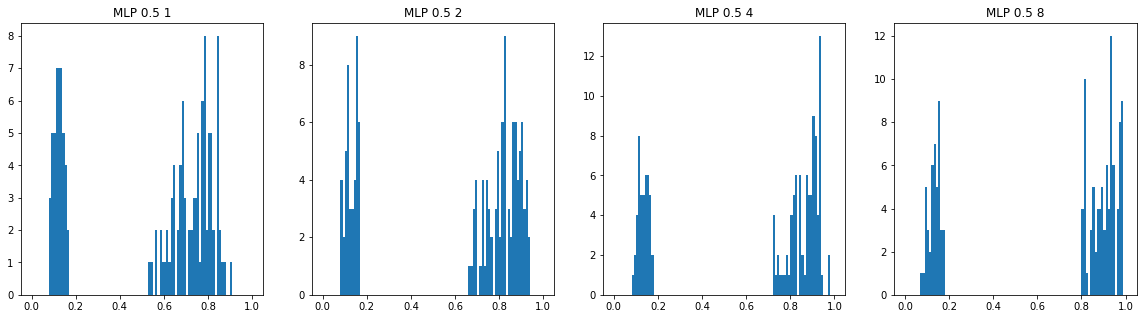

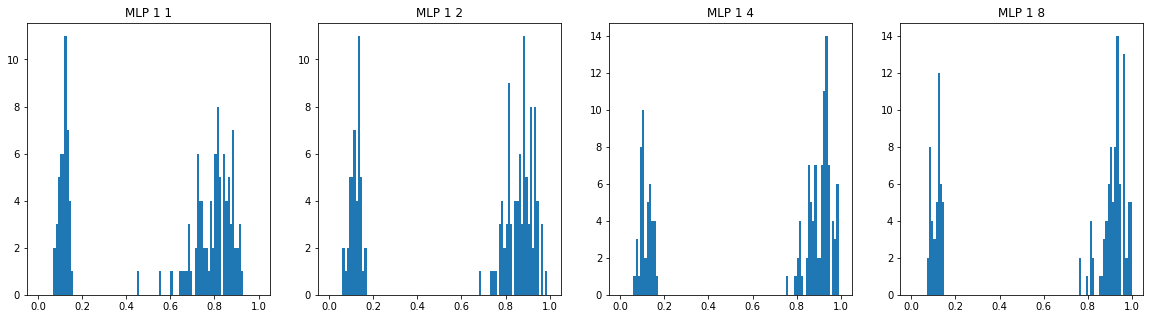

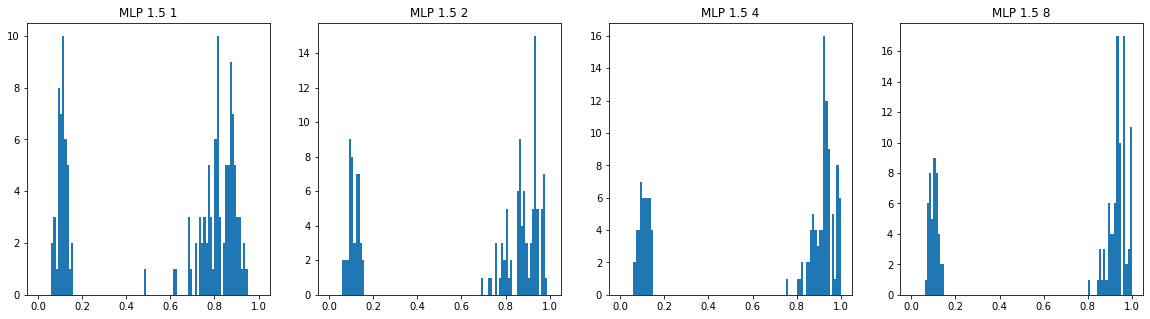

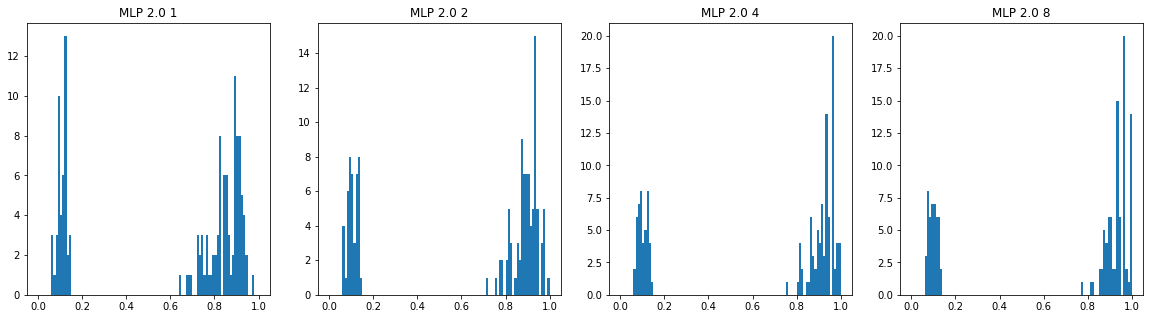

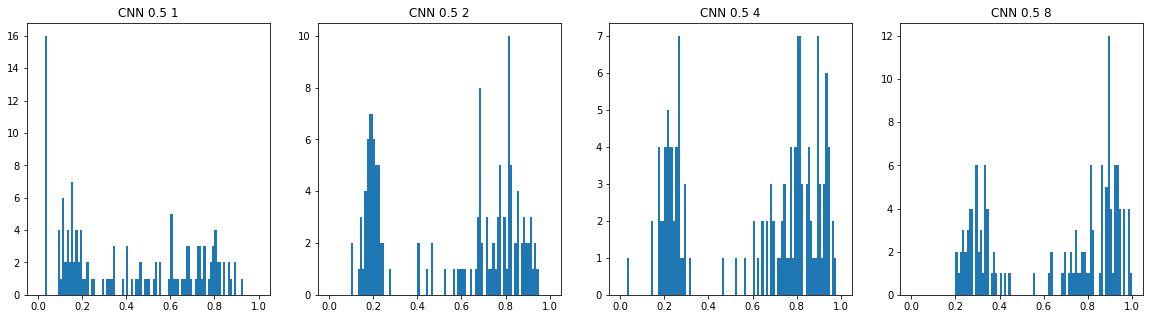

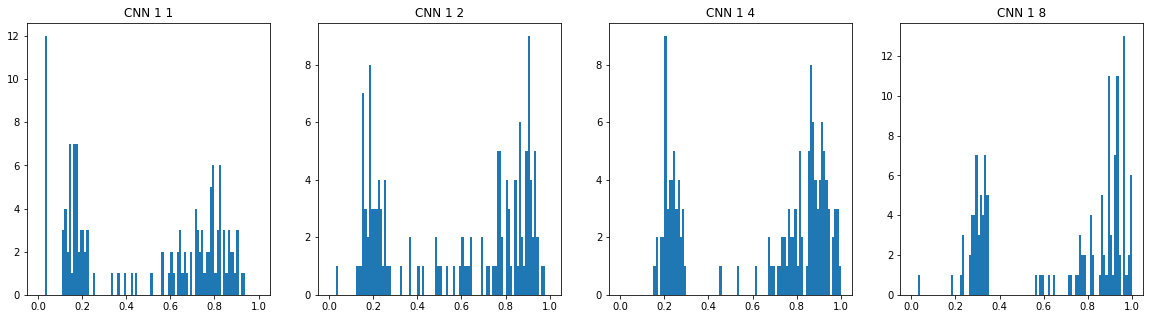

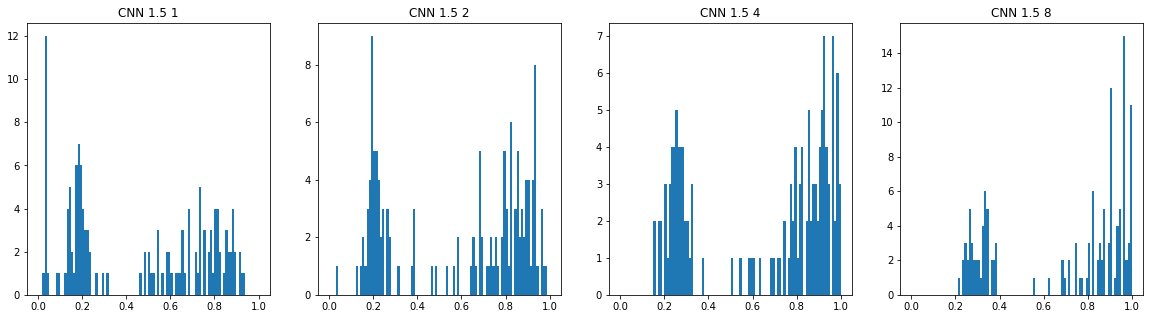

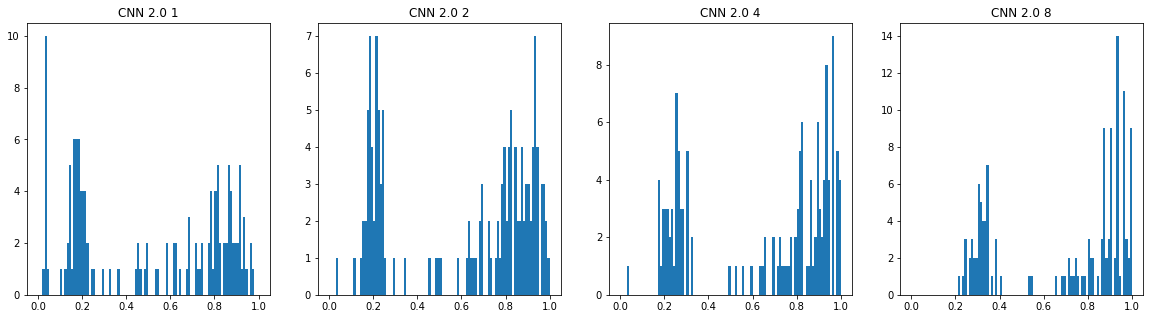

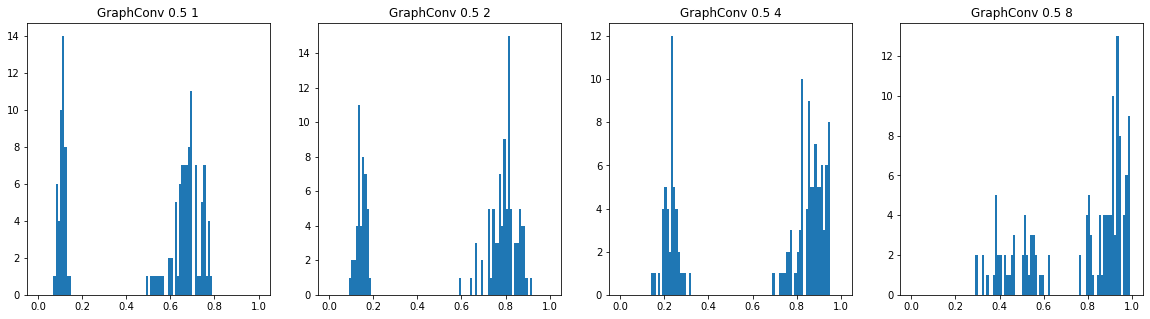

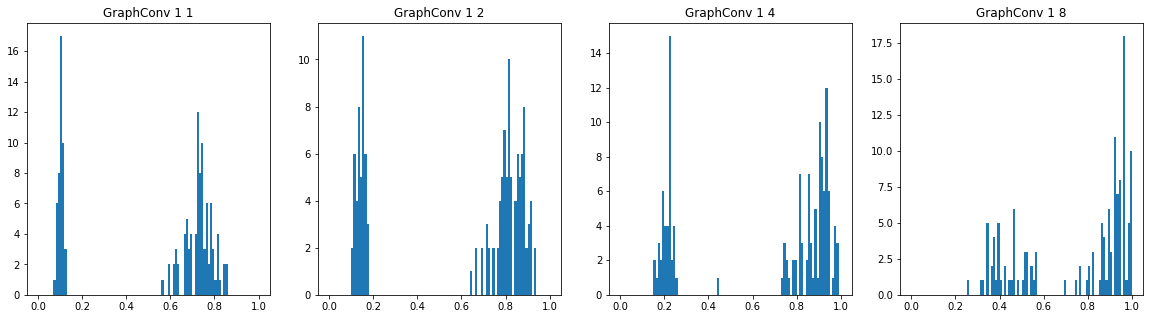

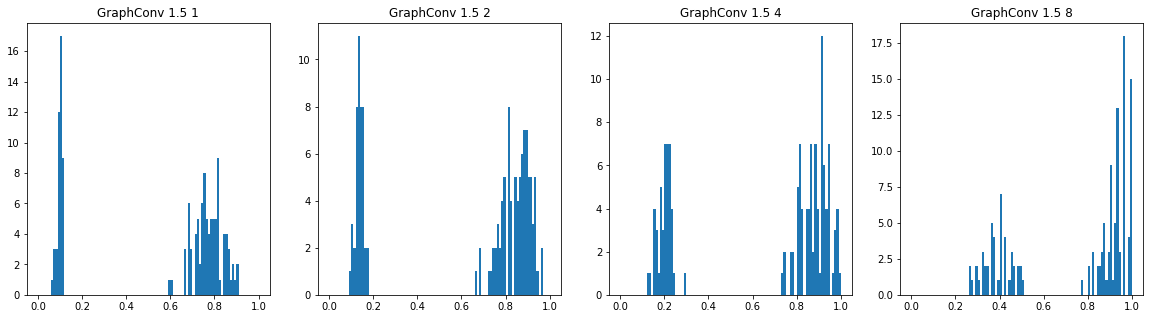

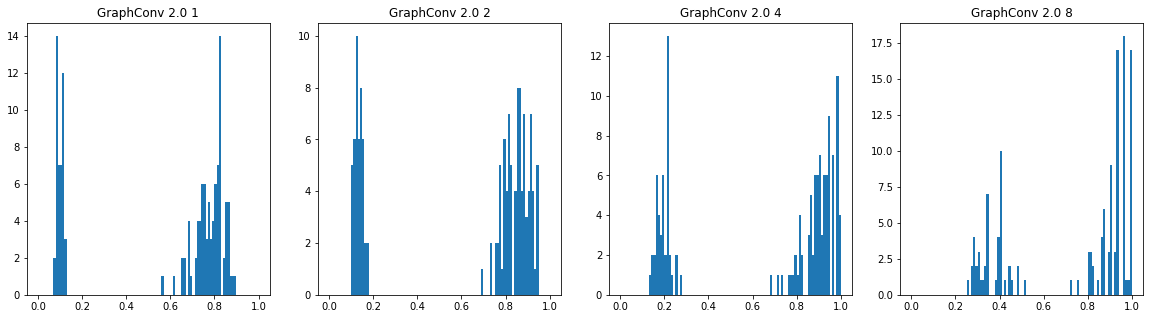

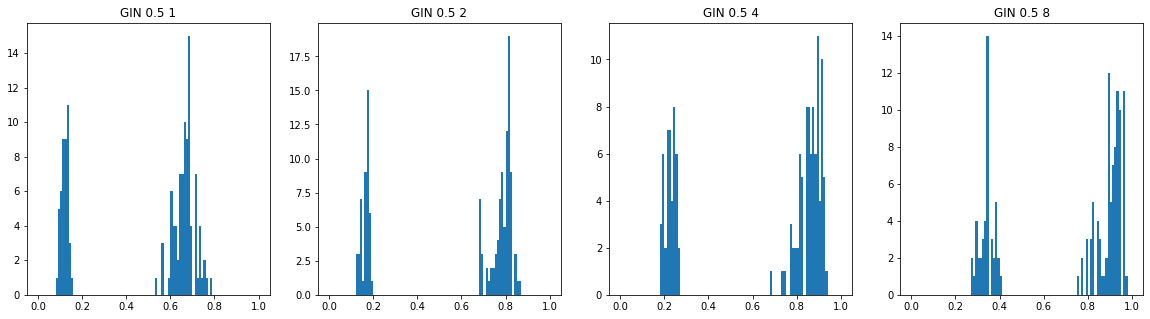

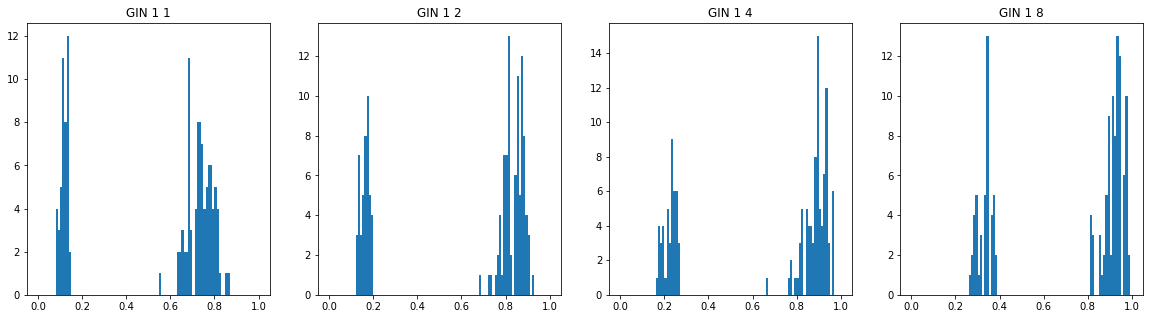

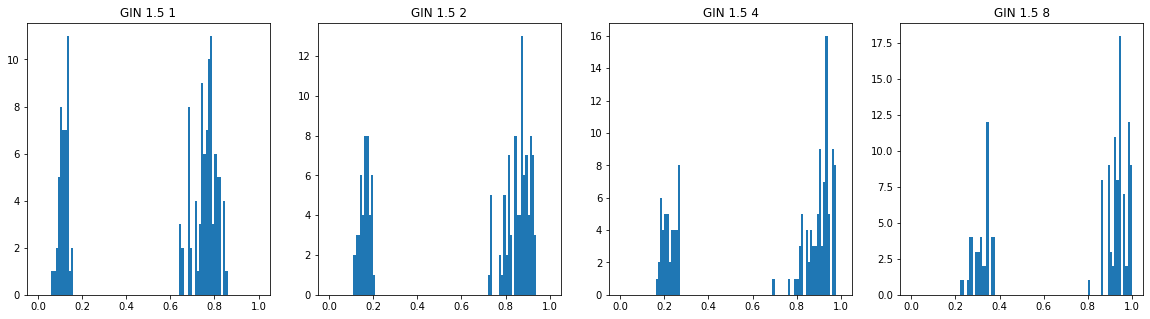

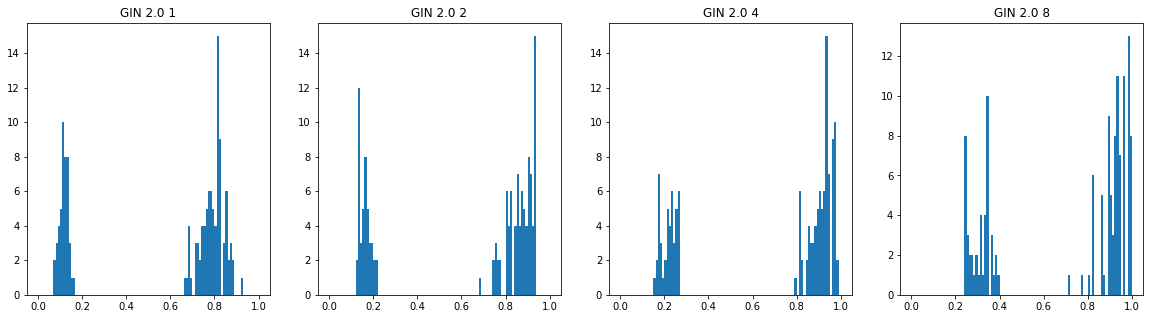

<Figure size 1440x360 with 0 Axes>

In [5]:
plt.figure(figsize=(20,5))
for model, ws in [(model,ws) for model in ['MLP','CNN','GraphConv','GIN'] for ws in [0.5, 1, 1.5, 2.0] ]:
    for i, nts in enumerate([1,2,4,8]):
        plt.subplot(1,4,i+1)
        accs = results[(results['model'] == f'\'{model}\'') & (results['number_train_samples'].astype(int)==nts) & (results['window_size'].astype(float) == ws)]['test_acc']
        accs = accs.astype(float).to_numpy()
        plt.title(f'{model} {ws} {nts}')
        plt.hist(np.round(accs,2),bins=100,range=(0,1),align='mid')
    plt.show()
    plt.figure(figsize=(20,5))

In [14]:
results[(results['test_acc'].astype(float) >.95)]['model'].value_counts()

'MLP'          247
'GraphConv'    197
'CNN'          172
'GIN'          163
Name: model, dtype: int64

In [22]:
results[(results['test_acc'].astype(float) >.95)]['eeg_feature'].value_counts()

'psd'    424
'wav'    355
Name: eeg_feature, dtype: int64

In [28]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 1.0 ) & (results['number_train_samples'].astype(float) == 2 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
695,'wav','MLP',64,1.0,16,0.005,0.25,0.04,'relu',2,...,2298,2.5627789457431556,0.9566470844212358,0.9532843683148252,0.9578087380844794,0.9566470844212358,0.9985488626589815,11408,73.8491563796997,139
705,'wav','MLP',128,1.0,16,0.005,0.5,0.0,'relu',2,...,2298,2.5578597540228754,0.9610802872062664,0.9591529365204085,0.9636783627747221,0.9610802872062663,0.9989835889114734,27904,82.80211019515991,149
708,'wav','MLP',128,1.0,16,0.005,0.5,0.01,'relu',2,...,2298,2.56936252345408,0.9511803742384682,0.9494693234563357,0.9545997273310384,0.9511803742384682,0.9990379303969501,27904,50.95078921318054,83
710,'wav','MLP',128,1.0,16,0.005,0.25,0.04,'relu',2,...,2298,2.567197456320438,0.9519963011314186,0.948375205190175,0.9536796513833508,0.9519963011314186,0.996938525864836,27904,54.77496910095215,90
711,'wav','MLP',128,1.0,16,0.005,0.5,0.04,'relu',2,...,2298,2.563420042512311,0.9568374673629243,0.9557537372351615,0.959639535025036,0.9568374673629243,0.9981843795975252,27904,56.68112826347351,93
746,'psd','MLP',64,1.0,16,0.005,0.25,0.64,'relu',2,...,2298,2.569559693440237,0.9528258268059182,0.951520978637165,0.9545283399511888,0.9528258268059182,0.9986124217581568,11408,55.367960691452026,91
756,'psd','MLP',128,1.0,16,0.005,0.5,0.04,'relu',2,...,2298,2.5435161227449528,0.9755629895561357,0.9750171856980702,0.9762764655128514,0.9755629895561357,0.9995100088208099,27904,67.89275193214417,120
151,'wav','CNN',64,1.0,16,0.0005,0.25,0.0,'relu',2,...,2298,2.55903318879706,0.9658534595300261,0.964672311354015,0.9654734904578226,0.9658534595300261,0.9986644230001903,20773,139.4437084197998,264
175,'wav','CNN',128,1.0,16,0.0005,0.25,0.16,'relu',2,...,2298,2.5591870220045716,0.964425587467363,0.9641888609031806,0.9651514421294085,0.964425587467363,0.9989979200511098,74277,167.44642424583435,325
211,'psd','CNN',128,1.0,16,0.0005,0.25,0.0,'relu',2,...,2298,2.569330614789659,0.9528394255874674,0.9384381894938438,0.926064959698454,0.9528394255874674,0.9990563943536298,74277,117.80588793754578,214


In [25]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == .5 ) & (results['number_train_samples'].astype(float) == 4 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
306,'wav','MLP',128,0.5,16,0.005,0.25,0.04,'relu',4,...,4696,2.564684674600726,0.9544293015332198,0.9530805101383973,0.9552393327806339,0.9544293015332197,0.9987979324602084,27904,41.70087003707886,58
348,'psd','MLP',128,0.5,16,0.005,0.25,0.01,'relu',4,...,4696,2.5516246719193822,0.9670131494889267,0.9657218113577324,0.9678228991946616,0.9670131494889267,0.9991747286639923,27904,48.32375383377075,71
358,'psd','MLP',128,0.5,16,0.005,0.5,0.64,'relu',4,...,4696,2.5506084144521615,0.9678915566439523,0.9673875973623326,0.967933827326138,0.9678915566439523,0.9991080330056471,27904,72.08822059631348,127
314,'wav','CNN',128,0.5,16,0.0005,0.5,0.64,'relu',4,...,4696,2.5633625371898865,0.9580893313458262,0.95705533049592,0.9577550184191597,0.9580893313458263,0.9986059652295051,74277,140.06851291656494,261
334,'psd','CNN',64,0.5,16,0.0005,0.25,0.01,'relu',4,...,4696,2.5502032916580393,0.9714916950596252,0.9710501786605958,0.9714795236308125,0.9714916950596253,0.9991359078956071,20773,118.34072947502136,208
350,'psd','CNN',128,0.5,16,0.0005,0.5,0.01,'relu',4,...,4696,2.5661401410525255,0.958621699318569,0.957832174220672,0.958669014628408,0.958621699318569,0.9990725618903586,74277,211.6953628063202,401
337,'psd','GraphConv',64,0.5,16,0.0005,0.25,0.04,'relu',4,...,4696,2.5698598897690665,0.9522266290459966,0.9506271349047836,0.9519915620984531,0.9522266290459966,0.9987851718073255,142048,91.93662905693054,144
346,'psd','GraphConv',128,0.5,16,0.0005,0.25,0.0,'relu',4,...,4696,2.571492747589311,0.9519937180579217,0.9509937446180469,0.9553205599070742,0.9519937180579217,0.9986687449748393,562592,51.84383773803711,67


In [31]:
results[(results['test_acc'].astype(float) >.95) & (results['window_size'].astype(float) == 2 ) & (results['number_train_samples'].astype(float) == 1 ) ]

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,number_test_samples,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params,train_time,best_epoch
1680,'psd','MLP',64,2.0,16,0.005,0.5,0.0,'relu',1,...,1099,2.5562011631539563,0.9717925386715196,0.9709127213004964,0.9728370452605195,0.9717925386715196,0.9989849004045768,11408,144.58334827423096,274
32,'wav','CNN',128,2.0,16,0.0005,0.5,0.0,'relu',1,...,1099,2.5588072679387754,0.9659918107370337,0.9615605978009882,0.9679825765425947,0.9659918107370337,0.9993122081155701,74277,175.68271660804749,339
35,'wav','CNN',128,2.0,16,0.0005,0.5,0.01,'relu',1,...,1099,2.5646522018017825,0.9618118744313012,0.9620327477253587,0.9652742794992666,0.9618118744313011,0.9990478530550495,74277,156.27012610435486,301
80,'psd','CNN',128,2.0,16,0.0005,0.5,0.01,'relu',1,...,1099,2.5704313849621845,0.9648828480436761,0.9646084126594714,0.9665392409319031,0.964882848043676,0.999238241714194,74277,124.22370767593384,237
